# Explore what is in the trainset and make first naive prediction

The objective of this task is to understand what is in the train folder, what format and shape of the data.

Once this is understood and mapped the aim is to do an initial exploratory analaysis on the data with the hope to come up with patterns that will give some ideas to the development of a train set to be trained in a ML model

In [1]:
# import packages

import numpy as np
from collections import defaultdict
import pandas as pd
import os
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [ ]:

'''
.
├── commodities.csv
├── geology
│   ├── geological_unit_polygons.geo.json
│   ├── misc_lines.geo.json
│   ├── shears_and_faults.geo.json
│   └── unit_contacts.geo.json
├── geophysics
│   ├── gravity
│   │   ├── bouger_gravity_anomaly.tif
│   │   └── isostatic_residual_gravity_anomaly.tif
│   ├── magnetics
│   │   ├── total_magnetic_intensity.tif
│   │   └── variable_reduction_to_pole.tif
│   └── radiometrics
│       ├── filtered_potassium_pct.tif
│       ├── filtered_terrestrial_dose.tif
│       ├── filtered_thorium_ppm.tif
│       └── filtered_uranium_ppm.tif
├── proj4_projection_definition.txt
└── remote_sensing
    └── aster
        ├── aloh_groun_content.tif
        ├── aloh_group_composition.tif
        ├── ferric_oxide_content.tif
        ├── ferrous_iron_content.tif
        ├── ferrous_iron_index.tif
        ├── kaolin_group_index.tif
        ├── mgoh_group_content.tif
        ├── opaque_index.tif
        ├── thermal_infrared_gypsum_index.tif
        ├── thermal_infrared_silica_index.tif
        └── tir_quartz_index.tif
        
'''      

print('A standard directory tree will look like this')


In [2]:
# open test raster file path
path = '/Users/pedrojunqueira/Desktop/train/75867950'

In [3]:
# Open the rasters


file = os.path.join(path,'geophysics','radiometrics','filtered_uranium_ppm.tif')

with rasterio.open(file, 'r') as src:
    meta = src.meta
    data = src.read(1)



In [4]:
meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 500,
 'height': 500,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Hotine_Oblique_Mercator_Azimuth_Center"],PARAMETER["latitude_of_center",-23.01516603082537],PARAMETER["longitude_of_center",149.81972950194],PARAMETER["azimuth",-10.3865295614415],PARAMETER["rectified_grid_angle",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'transform': Affine(50.100200400801604, 0.0, -12500.0,
        0.0, -50.100200400801604, 12500.0)}

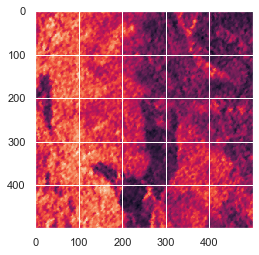

In [5]:
plt.imshow(data);

In [6]:
data

array([[ 1.2950095 ,  1.2944165 ,  1.2800831 , ..., -0.29757455,
        -0.29757455, -0.12937221],
       [ 1.2950095 ,  1.2944165 ,  1.2944165 , ..., -0.26795146,
        -0.29757455, -0.12937221],
       [ 1.47015   ,  1.2944165 ,  1.2944165 , ..., -0.26795146,
        -0.20284776, -0.20284776],
       ...,
       [ 1.397969  ,  1.397969  ,  1.4798021 , ...,  1.0758212 ,
         1.0758212 ,  1.2187028 ],
       [ 1.397969  ,  1.397969  ,  1.4798021 , ...,  1.2916387 ,
         1.2916387 ,  1.3531199 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.2916387 ,
         1.3531199 ,  1.3531199 ]], dtype=float32)

In [7]:
# inspecting geophysics files shape
for root, dirs, files in os.walk(path):
    for name in files:
        #print(os.path.join(root, name))
        ext = name.split('.')[-1]
        filename = name.split('.')[0]
        filepath = os.path.join(root, name)
        if ext == 'tif':
            openedfile = rasterio.open(filepath, 'r')
            filedata = openedfile.read(1)
            shape = filedata.shape
            print(f'the file {name} has the shape of {shape}')
            openedfile.close()
        

the file thermal_infrared_silica_index.tif has the shape of (500, 500)
the file ferric_oxide_content.tif has the shape of (500, 500)
the file kaolin_group_index.tif has the shape of (500, 500)
the file opaque_index.tif has the shape of (500, 500)
the file aloh_group_composition.tif has the shape of (500, 500)
the file ferrous_iron_content.tif has the shape of (500, 500)
the file mgoh_group_content.tif has the shape of (500, 500)
the file aloh_groun_content.tif has the shape of (500, 500)
the file thermal_infrared_gypsum_index.tif has the shape of (500, 500)
the file ferrous_iron_index.tif has the shape of (500, 500)
the file tir_quartz_index.tif has the shape of (500, 500)
the file bouger_gravity_anomaly.tif has the shape of (500, 500)
the file isostatic_residual_gravity_anomaly.tif has the shape of (500, 500)
the file total_magnetic_intensity.tif has the shape of (500, 500)
the file variable_reduction_to_pole.tif has the shape of (500, 500)
the file filtered_uranium_ppm.tif has the sh

In [8]:
# create a dictionary to extract geophysics file features

file_structure = dict()

for root, dirs, files in os.walk(path):
    for name in files:
        #print(os.path.join(root, name))
        ext = name.split('.')[-1]
        filename = name.split('.')[0]
        filepath = os.path.join(root, name)
        if ext == 'tif':
            #print(f'the file {name} has the path{filepath}')
            first = '/'.join(filepath.split('/')[:5])
            second = '/'.join(filepath.split('/')[6:])
            file_structure[filename] = (first,second)
            file_structure[filename] = (first,second)
            #print(f"... {os.path.join(first,'fileid',second)}")
        
        

In [9]:
file_structure

{'thermal_infrared_silica_index': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/thermal_infrared_silica_index.tif'),
 'ferric_oxide_content': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/ferric_oxide_content.tif'),
 'kaolin_group_index': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/kaolin_group_index.tif'),
 'opaque_index': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/opaque_index.tif'),
 'aloh_group_composition': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/aloh_group_composition.tif'),
 'ferrous_iron_content': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/ferrous_iron_content.tif'),
 'mgoh_group_content': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/mgoh_group_content.tif'),
 'aloh_groun_content': ('/Users/pedrojunqueira/Desktop/train',
  'remote_sensing/aster/aloh_groun_content.tif'),
 'thermal_infrared_gypsum_index': ('/Users/pedrojunqueira/Desktop/trai

In [10]:
stamps_data = '../data/stamp_locations.geo.json'

In [11]:
stamps = gpd.read_file(stamps_data)

In [12]:
stamps[stamps['id']=='00014292']

,id,age,comment,commodities_string,original_id,latitude,longitude,name,offset_azimuth,offset_distance,rotation,centre_longitude,centre_latitude,local_projection,stratification_label,commodity_string,geometry
276,00014292,Archaean,nan,Au,333715.0,-28.452002,120.913028,Bannockburn,91.072937,4.498334,50.005914,120.959162,-28.457029,+proj=omerc +lat_0=-28.457028916885 +lonc=120....,Au,Au;Ni,"POLYGON ((121.13913 -28.44309, 120.97500 -28.6..."


In [13]:
stamps.age.value_counts()

Proterozoic            113
Archean                 98
Archaean                97
Palaeozoic              40
Precambrian             28
Tertiary                25
Palaeoproterozoic       24
Devonian                23
unknown                 22
Silurian                19
Quaternary              19
Permian                 15
Carboniferous           14
Late Ordovician         12
Triassic                11
Cainozoic               11
Early Devonian          10
Ordovician               9
Late Palaeozoic          8
Mesoproterozoic          7
Paleoproterozoic         5
Late Carboniferous       5
Early Cretaceous         5
Late Triassic            4
Late Permian             4
Early Permian            4
Late Cambrian            4
Early Palaeozoic         4
Neoproterozoic           4
Late Silurian            3
Early Pliocene           3
Cretaceous               3
Cambrian                 3
Middle Devonian          2
Pleistocene              2
Jurassic                 1
Middle Triassic          1
E

In [14]:
stamps.groupby(['stratification_label','age'])['stratification_label'].count()

stratification_label  age          
Au                    Archaean         58
                      Archean          85
                      Cainozoic         5
                      Cambrian          1
                      Carboniferous     8
                                       ..
other                 Proterozoic       5
                      Quaternary       18
                      Silurian          1
                      Tertiary          8
                      Triassic          1
Name: stratification_label, Length: 107, dtype: int64

In [15]:
stamps.shape

(2485, 17)

In [16]:
trainpath = '/Users/pedrojunqueira/Desktop/train'

In [17]:
id_label = dict()

for i, label in zip(stamps['id'].tolist(),stamps['stratification_label'].tolist()):
    id_label[i] = label
    

In [18]:
trainids = os.listdir(trainpath)

In [19]:
len(trainids)

1863

In [20]:
# fixing stamp that does not have trainset
id_train = dict()

for item in trainids:
    label = id_label.get(item)
    if label == None:
        id_train[item] = 'none'
    else:
        id_train[item] = label

In [ ]:
# extract feature stats

# for key, value in file_structure.items():
#     print(f'processing... {key}')
#     name = ''.join(key.split('_')[:2])
#     print(name)
#     df_data = defaultdict(list)

#     for i, stampid in enumerate(trainids):
#         label = id_train[stampid]
#         df_data['id'].append(stampid)
#         df_data['label'].append(label)
#         first, second = value
#         image_path = os.path.join(first,stampid,second)
#         #print(image_path)
#         try:
#             with rasterio.open(image_path, 'r') as src:
#                 image_data = src.read(1)
#                 _max = image_data.max()
#                 _min = image_data.min()
#                 _mean = image_data.mean()
#                 df_data['_max'].append(_max)
#                 df_data['_min'].append(_min)
#                 df_data['_mean'].append(_mean)
#         except Exception as err:
#             print(err)
#             continue

#         if i%500 == 0:
#                 print(f'{i}/{len(trainids)} images processed')
#     print(f'{i+1}/{len(trainids)} images processed')
#     df = pd.DataFrame(df_data)
#     print(f'saving... csv {name}_.csv')
#     df.to_csv(f'{name}_.csv',index=False)

 

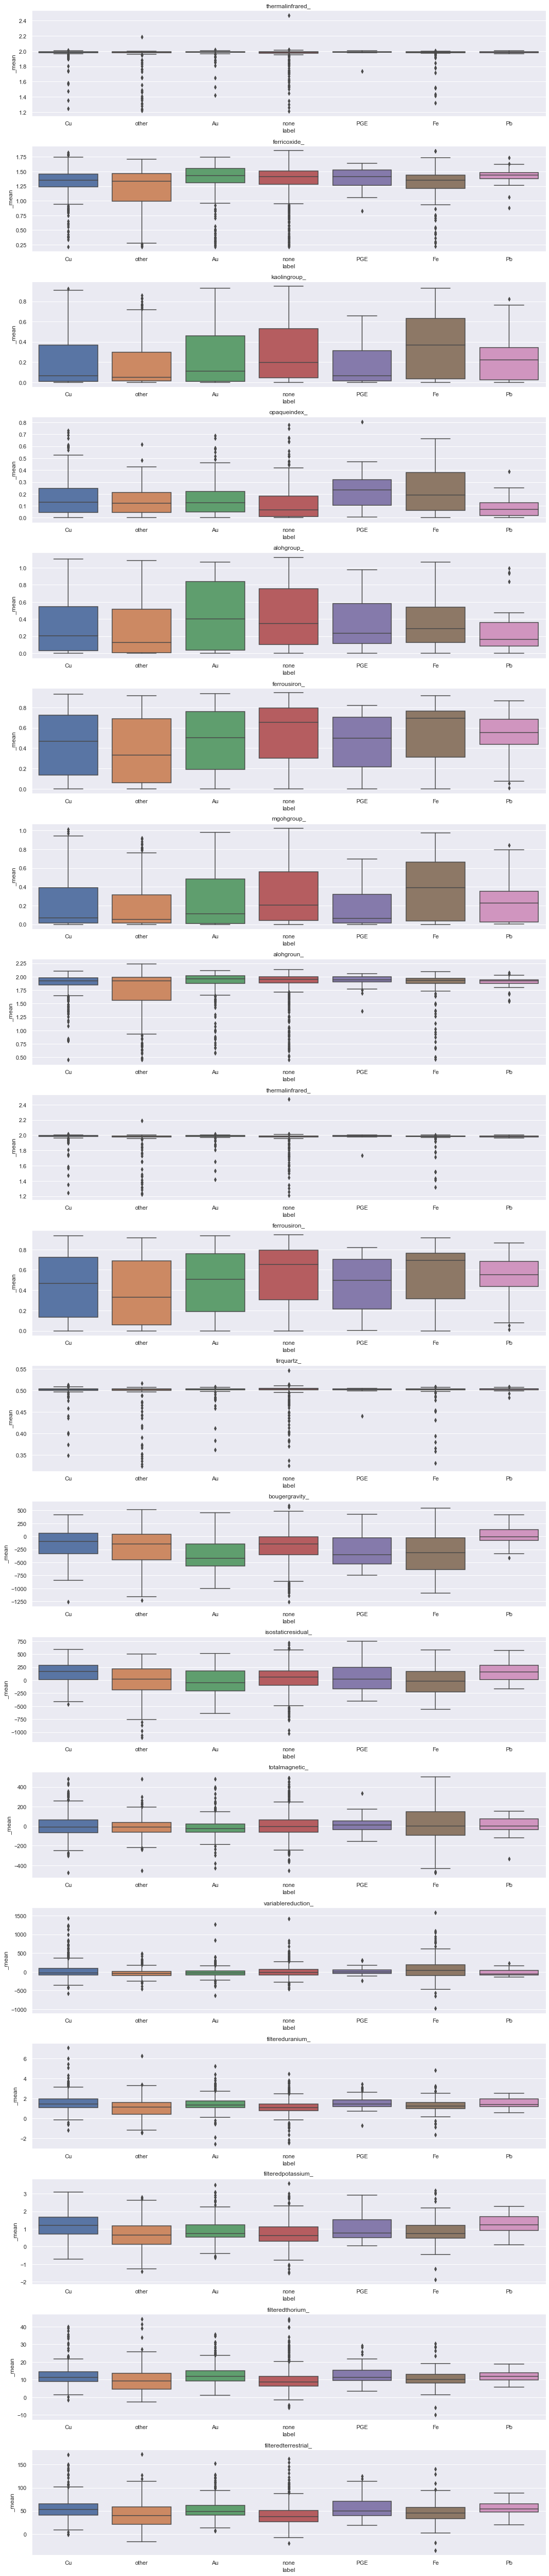

In [21]:
# plotting box plot of average distribution for each class
sets = []
for key in file_structure.keys():
    name = ''.join(key.split('_')[:2])
    sets.append(f'{name}_.csv')

fig, ax = plt.subplots(nrows=len(sets),ncols=1,  figsize=(15,70))
for i, chart in enumerate(sets):
    name = chart.split('.')[0]
    df = pd.read_csv(chart)
    mean_plus = df['_mean'].mean() + 3*df['_mean'].std()
    mean_minus = df['_mean'].mean() - 3*df['_mean'].std()
    #print(f'for {name} mean_plus is {mean_plus} and mean_minus is {mean_minus}')
    if df._mean.mean() == np.Inf:
        sns.boxplot(y='_mean',x='label',data=df,ax=ax[i])
        ax[i].set_title(name)
    else:
        df = df[(df['_mean']>mean_minus)&(df['_mean']<mean_plus)]
        sns.boxplot(y='_mean',x='label',data=df,ax=ax[i])
        ax[i].set_title(name)
fig.tight_layout()

In [22]:
# creating a dataset for training from gravity mean features

df_template = pd.read_csv('bougergravity_.csv')
df_template = df_template.set_index('id')
df_template = df_template.loc[:,['label']]

for i, chart in enumerate(sets):
    name = chart.split('.')[0]
    df = pd.read_csv(chart)
    mean_plus = df['_mean'].mean() + 3*df['_mean'].std()
    mean_minus = df['_mean'].mean() - 3*df['_mean'].std()
    if df._mean.mean() == np.Inf:
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')
    else:
        df = df[(df['_mean']>mean_minus)&(df['_mean']<mean_plus)]
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')

In [23]:
df_template

,label,thermalinfrared_mean_,ferricoxide_mean,kaolingroup_mean,opaqueindex_mean,alohgroup_mean,ferrousiron_mean_,mgohgroup_mean,alohgroun_mean,thermalinfrared_mean,ferrousiron_mean,tirquartz_mean,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filtereduranium_mean,filteredpotassium_mean,filteredthorium_mean,filteredterrestrial_mean
id,,,,,,,,,,,,,,,,,,,,
82771002,Cu,1.998927,0.835281,0.009370,0.265524,0.009877,0.022348,0.009553,1.388070,1.998927,0.022348,0.500123,-410.268707,176.186218,-23.305887,-178.344238,0.392306,0.186374,5.379144,30.443665
23922457,other,1.977937,1.319718,0.042899,0.123172,0.072096,0.221990,0.041484,1.897491,1.977937,0.221990,0.502975,399.985565,480.419495,-20.097960,-113.159195,1.842588,0.235144,11.334793,41.800873
613312,Au,1.995508,1.327604,0.061973,0.396698,0.106710,0.225690,0.063930,1.891458,1.995508,0.225690,0.501033,-481.462646,-133.482468,-114.317390,-44.833431,1.616040,0.546743,20.238270,66.795570
30527645,other,1.980505,1.710941,0.830217,0.071426,0.975950,0.791769,0.910242,2.055002,1.980505,0.791769,0.504919,-793.776001,-348.356415,3.402445,218.110413,1.384084,1.122728,13.496873,56.198921
51982094,none,1.992477,1.298710,0.043700,0.182975,0.076571,0.335803,0.045526,1.889201,1.992477,0.335803,0.501849,83.249107,395.767517,-88.855385,-110.596634,1.983564,1.535960,12.022222,61.618431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47763108,Cu,1.991252,1.276074,0.049948,0.322423,0.254132,0.398667,0.053425,1.934185,1.991252,0.398667,0.502201,-8.042233,247.733093,-17.075199,-193.324127,2.164667,1.923187,14.384885,73.311821
76723666,other,1.990360,1.380955,0.026920,0.073815,0.268217,0.344331,0.029158,1.965018,1.990360,0.344331,0.502367,-321.709076,-65.131439,-141.291901,-27.206430,1.410394,1.563832,10.340075,54.243931
42884730,Cu,1.986119,1.423906,0.455566,0.046008,0.521481,0.744827,0.512865,1.968761,1.986119,0.744827,0.503425,16.105562,272.645233,-71.654495,46.913425,1.480522,1.171435,13.934771,58.475307


In [24]:
# adding age to the feature
stamp_feature = stamps.loc[:,['id','age']]
stamp_feature = stamp_feature.set_index('id')
stamp_feature.index = stamp_feature.index.astype(int)
# fixing typo
stamp_feature.loc[:,'age'] = stamp_feature['age'].str.replace('Archean','Archaean')

In [25]:
df_template = df_template.join(stamp_feature)

In [26]:
# create dummy column for age and adding to dataset
df_template = df_template.join(pd.get_dummies(df_template["age"]))

In [27]:
dataset = df_template.copy()
# dropping age column
dataset.drop(columns=['age'], inplace=True)

In [28]:
# factorizing labels 
factor = pd.factorize(dataset['label'])
dataset.loc[:,'label'] = factor[0]
definitions = factor[1]
print(dataset['label'].head())
print(definitions)

id
82771002    0
23922457    1
613312      2
30527645    1
51982094    3
Name: label, dtype: int64
Index(['Cu', 'other', 'Au', 'none', 'PGE', 'Fe', 'Pb'], dtype='object')


In [29]:
# drop inf rows
dataset = dataset[dataset['filtereduranium_mean']!=np.inf]

In [30]:
# drop nan
dataset = dataset.dropna()


In [31]:
# creating X matrix and y target vector
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

X.shape


(1692, 59)

In [32]:
# split train test
trainX, testX, trainY, testY = train_test_split(X, y,
                                                  test_size=0.25, random_state=42)

In [33]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
# Predicting the Test set results
predY = classifier.predict(testX)

reversefactor = dict(zip(range(7),definitions))
testY = np.vectorize(reversefactor.get)(testY)
predY = np.vectorize(reversefactor.get)(predY)
# Making the Confusion Matrix
print(pd.crosstab(testY, predY, rownames=['Actual Classes'], colnames=['Predicted Classes']))

Predicted Classes  Au  Cu  Fe  PGE  none  other
Actual Classes                                 
Au                 55  17   1    1    23      1
Cu                 11  29   0    1    19      4
Fe                  5   6  10    0    19      3
PGE                 1   2   0    2     2      1
Pb                  0   1   1    0     1      0
none               17  15   2    0   131      8
other               5   3   1    0    18      7


In [35]:
# class report

print(classification_report(testY,
predY,
target_names=factor[1]))


              precision    recall  f1-score   support

          Cu       0.59      0.56      0.57        98
       other       0.40      0.45      0.42        64
          Au       0.67      0.23      0.34        43
        none       0.50      0.25      0.33         8
         PGE       0.00      0.00      0.00         3
          Fe       0.62      0.76      0.68       173
          Pb       0.29      0.21      0.24        34

    accuracy                           0.55       423
   macro avg       0.44      0.35      0.37       423
weighted avg       0.55      0.55      0.54       423



/Users/pedrojunqueira/anaconda3/envs/exploration/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:

# evaluating feature importances
feat_labels = dataset.drop('label',axis=1).columns
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for feature in range(trainX.shape[1]):
    print(f'{feature} - {feat_labels[indices[feature]]} {importances[indices[feature]]:.2f}')

0 - isostaticresidual_mean 0.06
1 - filteredterrestrial_mean 0.06
2 - filteredpotassium_mean 0.06
3 - bougergravity_mean 0.06
4 - alohgroun_mean 0.05
5 - opaqueindex_mean 0.05
6 - filtereduranium_mean 0.05
7 - filteredthorium_mean 0.05
8 - ferrousiron_mean 0.05
9 - alohgroup_mean 0.05
10 - thermalinfrared_mean 0.05
11 - variablereduction_mean 0.05
12 - ferricoxide_mean 0.05
13 - kaolingroup_mean 0.05
14 - mgohgroup_mean 0.04
15 - totalmagnetic_mean 0.04
16 - thermalinfrared_mean_ 0.04
17 - tirquartz_mean 0.04
18 - ferrousiron_mean_ 0.04
19 - Archaean 0.03
20 - Proterozoic 0.01
21 - Silurian 0.01
22 - Palaeoproterozoic 0.00
23 - unknown 0.00
24 - Permian 0.00
25 - Palaeozoic 0.00
26 - Quaternary 0.00
27 - Late Ordovician 0.00
28 - Cainozoic 0.00
29 - Mesoproterozoic 0.00
30 - Tertiary 0.00
31 - Early Carboniferous 0.00
32 - Precambrian 0.00
33 - Ordovician 0.00
34 - Late Palaeozoic 0.00
35 - Early Palaeozoic 0.00
36 - Triassic 0.00
37 - Neoproterozoic 0.00
38 - Late Triassic 0.00
39 - L

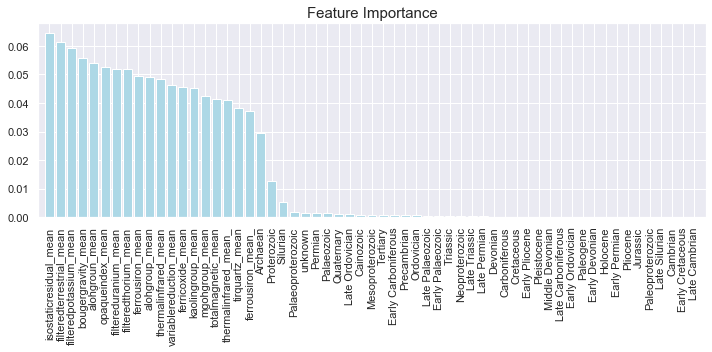

In [37]:
# plotting feature importance
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(trainX.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(trainX.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,trainX.shape[1]])
plt.tight_layout()

In [ ]:
# create dataset of all images

# data = []
# labels = []
# for i, stampid in enumerate(trainids):
#     label = id_train[stampid]
#     labels.append(label)
#     image_path = os.path.join(trainpath,stampid,'geophysics','gravity','bouger_gravity_anomaly.tif')
#     try:
#         with rasterio.open(image_path, 'r') as src:
#             image_data = src.read(1)        
#             data.append(image_data)
#     except Exception as err:
#         print(err)
#         continue
        
#     if i%100 == 0:
#             print(f'{i}/{len(trainids)} images processed')
# print(f'{i+1}/{len(trainids)} images processed')            

    
# dataset = (np.array(data), np.array(labels))    

In [38]:
path = '/Users/pedrojunqueira/Desktop/test/00651042'

In [39]:
file_structure = dict()

for root, dirs, files in os.walk(path):
    for name in files:
        #print(os.path.join(root, name))
        ext = name.split('.')[-1]
        filename = name.split('.')[0]
        filepath = os.path.join(root, name)
        if ext == 'tif':
            #print(f'the file {name} has the path{filepath}')
            first = '/'.join(filepath.split('/')[:5])
            second = '/'.join(filepath.split('/')[6:])
            file_structure[filename] = (first,second)
            file_structure[filename] = (first,second)
            #print(f"... {os.path.join(first,'fileid',second)}")
        

In [40]:
testpath = '/Users/pedrojunqueira/Desktop/test'

In [41]:
testids = os.listdir(testpath)

In [42]:
len(testids)

622

In [ ]:
# Extract Test Set features


# for key, value in file_structure.items():
#     print(f'processing... {key}')
#     name = ''.join(key.split('_')[:2])
#     df_data = defaultdict(list)

#     for i, stampid in enumerate(testids):
#         df_data['id'].append(stampid)
#         first, second = value
#         image_path = os.path.join(first,stampid,second)
#         try:
#             with rasterio.open(image_path, 'r') as src:
#                 image_data = src.read(1)
#                 _max = image_data.max()
#                 _min = image_data.min()
#                 _mean = image_data.mean()
#                 df_data['_max'].append(_max)
#                 df_data['_min'].append(_min)
#                 df_data['_mean'].append(_mean)
#         except Exception as err:
#             print(err)
#             continue

#         if i%500 == 0:
#                 print(f'{i}/{len(testids)} images processed')
#     print(f'{i+1}/{len(testids)} images processed')
#     df = pd.DataFrame(df_data)
#     print(f'saving... csv {name}_.csv')
#     df.to_csv(f'./testfeatures/{name}_.csv',index=False)

 

In [43]:
stamps[stamps['id']=='00651042']

,id,age,comment,commodities_string,original_id,latitude,longitude,name,offset_azimuth,offset_distance,rotation,centre_longitude,centre_latitude,local_projection,stratification_label,commodity_string,geometry
298,00651042,None,nan,Ag;Zn;Cu;Pb,333767.0,-28.444641,121.156281,Jaguar,214.868224,1.886109,72.671657,121.143565,-28.457695,+proj=omerc +lat_0=-28.457694669474908 +lonc=1...,Cu,Ag;Au;Cu;Pb;Zn,"POLYGON ((121.30349 -28.38387, 121.22763 -28.5..."


In [45]:
sets = []
for key in file_structure.keys():
    name = ''.join(key.split('_')[:2])
    sets.append(f'{name}_.csv')

In [46]:

df_template = pd.read_csv('./testfeatures/bougergravity_.csv')
df_template = df_template.set_index('id')
df_template.drop(columns=['_max','_min','_mean'], inplace=True)

In [47]:
df_template

""
id
27801422
28602042
51054869
87417444
17096412
...
21708849
67980748
44859977


In [48]:
for i, chart in enumerate(sets):
    name = chart.split('.')[0]
    df = pd.read_csv(f'./testfeatures/{chart}')
    mean_plus = df['_mean'].mean() + 3*df['_mean'].std()
    mean_minus = df['_mean'].mean() - 3*df['_mean'].std()
    if df._mean.mean() == np.Inf:
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')
    else:
        df = df[(df['_mean']>mean_minus)&(df['_mean']<mean_plus)]
        df = df.set_index('id')
        df = df.loc[:,['_mean']]
        df.rename(columns={'_mean': f'{name}mean'},inplace=True)
        df_template = df_template.join(df,lsuffix='_')

In [49]:
df_template

,thermalinfrared_mean_,ferricoxide_mean,kaolingroup_mean,opaqueindex_mean,alohgroup_mean,ferrousiron_mean_,mgohgroup_mean,alohgroun_mean,thermalinfrared_mean,ferrousiron_mean,tirquartz_mean,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filtereduranium_mean,filteredpotassium_mean,filteredthorium_mean,filteredterrestrial_mean
id,,,,,,,,,,,,,,,,,,,
27801422,1.997092,1.397732,0.023839,0.074923,0.011993,0.299251,0.025428,1.866245,1.997092,0.299251,0.500520,-172.272171,72.779373,-48.256542,-20.569489,1.646903,1.061608,13.227251,56.218643
28602042,1.952776,1.375288,0.096364,0.128167,0.290701,0.556252,0.096100,1.829471,1.952776,0.556252,0.500473,220.924759,299.003571,-16.531801,-80.571182,2.307039,0.784672,14.408765,59.289845
51054869,1.990980,1.314613,0.026998,0.159133,0.020633,0.194831,0.025902,1.797541,1.990980,0.194831,0.502108,192.677383,363.576508,-17.335123,-55.179779,1.014108,1.946370,8.699978,52.907433
87417444,1.973711,1.363256,0.509750,0.001284,0.814820,0.842567,0.550457,1.993511,1.973711,0.842567,0.506644,-700.860291,-364.126678,-123.523308,34.771961,0.329191,0.279569,4.935589,17.833719
17096412,1.991862,1.250252,0.014130,0.173400,0.115153,0.193107,0.013920,1.865080,1.991862,0.193107,0.501727,-47.578903,219.717255,-7.001501,-30.060566,1.720664,1.766450,16.442291,73.873489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21708849,1.998321,0.810604,0.003648,0.173175,0.000700,0.005835,0.003898,1.494196,1.998321,0.005835,0.499899,-455.000305,189.835129,-32.811146,-110.170639,0.987803,0.785529,6.667801,32.508415
67980748,1.988302,1.440760,0.326883,0.016193,0.421049,0.710326,0.337730,1.969169,1.988302,0.710326,0.502874,-251.381851,16.076227,41.628445,79.319046,1.701424,0.822453,25.295925,83.499672
44859977,1.976494,1.454007,0.660710,0.000131,0.895648,0.831983,0.711411,2.014436,1.976494,0.831983,0.505930,-122.933296,154.821289,-86.711189,-90.443123,1.046384,0.616383,8.889436,36.169548


In [50]:
# adding age to the feature
stamp_feature = stamps.loc[:,['id','age']]
stamp_feature = stamp_feature.set_index('id')
stamp_feature.index = stamp_feature.index.astype(int)
# fixing typo
stamp_feature.loc[:,'age'] = stamp_feature['age'].str.replace('Archean','Archaean')

In [51]:
df_template = df_template.join(stamp_feature)

In [52]:
df_template

,thermalinfrared_mean_,ferricoxide_mean,kaolingroup_mean,opaqueindex_mean,alohgroup_mean,ferrousiron_mean_,mgohgroup_mean,alohgroun_mean,thermalinfrared_mean,ferrousiron_mean,tirquartz_mean,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filtereduranium_mean,filteredpotassium_mean,filteredthorium_mean,filteredterrestrial_mean,age
id,,,,,,,,,,,,,,,,,,,,
27801422,1.997092,1.397732,0.023839,0.074923,0.011993,0.299251,0.025428,1.866245,1.997092,0.299251,0.500520,-172.272171,72.779373,-48.256542,-20.569489,1.646903,1.061608,13.227251,56.218643,None
28602042,1.952776,1.375288,0.096364,0.128167,0.290701,0.556252,0.096100,1.829471,1.952776,0.556252,0.500473,220.924759,299.003571,-16.531801,-80.571182,2.307039,0.784672,14.408765,59.289845,None
51054869,1.990980,1.314613,0.026998,0.159133,0.020633,0.194831,0.025902,1.797541,1.990980,0.194831,0.502108,192.677383,363.576508,-17.335123,-55.179779,1.014108,1.946370,8.699978,52.907433,None
87417444,1.973711,1.363256,0.509750,0.001284,0.814820,0.842567,0.550457,1.993511,1.973711,0.842567,0.506644,-700.860291,-364.126678,-123.523308,34.771961,0.329191,0.279569,4.935589,17.833719,None
17096412,1.991862,1.250252,0.014130,0.173400,0.115153,0.193107,0.013920,1.865080,1.991862,0.193107,0.501727,-47.578903,219.717255,-7.001501,-30.060566,1.720664,1.766450,16.442291,73.873489,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21708849,1.998321,0.810604,0.003648,0.173175,0.000700,0.005835,0.003898,1.494196,1.998321,0.005835,0.499899,-455.000305,189.835129,-32.811146,-110.170639,0.987803,0.785529,6.667801,32.508415,None
67980748,1.988302,1.440760,0.326883,0.016193,0.421049,0.710326,0.337730,1.969169,1.988302,0.710326,0.502874,-251.381851,16.076227,41.628445,79.319046,1.701424,0.822453,25.295925,83.499672,None
44859977,1.976494,1.454007,0.660710,0.000131,0.895648,0.831983,0.711411,2.014436,1.976494,0.831983,0.505930,-122.933296,154.821289,-86.711189,-90.443123,1.046384,0.616383,8.889436,36.169548,None


In [53]:
# create dummy column for age and adding to dataset
df_template = df_template.join(pd.get_dummies(df_template["age"]))

In [54]:
testdataset = df_template.copy()
# dropping age column
testdataset.drop(columns=['age'], inplace=True)

In [55]:
for col in testdataset.columns[:19]:
    if (testdataset[col]==np.inf).sum() > 0:
        print(f"{col} : {(testdataset[col]==np.inf).sum()}")
testdataset.shape        

filtereduranium_mean : 5
filteredpotassium_mean : 5
filteredthorium_mean : 5
filteredterrestrial_mean : 5


(622, 52)

In [56]:
# drop inf rows
testdataset = testdataset[testdataset['filtereduranium_mean']!=np.inf]
testdataset.shape

(617, 52)

In [57]:
# drop nan
testdataset = testdataset.dropna()
testdataset.shape

(551, 52)

In [58]:
dscols = dataset.columns[1:]
tdscols = testdataset.columns

In [59]:
# missing columns in testdataset
misscols = [col for col in dscols if col not in tdscols]

In [60]:
print(len(dscols))
print(len(tdscols))
print(len(misscols))

59
52
8


In [61]:
extracol = [col for col in tdscols if col not in dscols]

In [62]:
print(len(extracol))

1


In [63]:
# drop extra cols

testdataset.drop(columns=extracol, inplace=True)
testdataset.shape

(551, 51)

In [64]:
# add missing columns
for col in misscols:
    testdataset.loc[:,col] = 0
testdataset.shape    

(551, 59)

In [65]:
# make testdataset cols on the same order of the traindataset

testdataset = testdataset.loc[:,dscols]

In [66]:
# create ML ready vector
testX = testdataset.values
testX.shape    

(551, 59)

In [67]:
# Predicting the Test set results
testpredY = classifier.predict(testX)

In [68]:
reversefactor = dict(zip(range(7),definitions))
testpredY = np.vectorize(reversefactor.get)(testpredY)


In [69]:
testpredY

array(['Au', 'none', 'Cu', 'none', 'Cu', 'Cu', 'Cu', 'Fe', 'Au', 'Au',
       'none', 'none', 'Cu', 'Cu', 'none', 'Cu', 'none', 'none', 'none',
       'Cu', 'none', 'Au', 'Cu', 'none', 'other', 'Cu', 'Au', 'Cu',
       'none', 'none', 'other', 'none', 'none', 'other', 'none', 'Au',
       'Au', 'none', 'none', 'none', 'none', 'none', 'none', 'Cu', 'none',
       'Au', 'Cu', 'Cu', 'none', 'Cu', 'Au', 'none', 'none', 'Au', 'none',
       'Au', 'Fe', 'none', 'Cu', 'other', 'none', 'none', 'Cu', 'none',
       'Au', 'none', 'none', 'Au', 'Au', 'none', 'Cu', 'none', 'none',
       'Au', 'Au', 'none', 'Cu', 'none', 'Au', 'Cu', 'Cu', 'none', 'none',
       'Au', 'none', 'Cu', 'Fe', 'Au', 'none', 'none', 'Fe', 'none', 'Cu',
       'Au', 'Cu', 'Cu', 'Au', 'none', 'none', 'Cu', 'Au', 'Au', 'Au',
       'none', 'Cu', 'other', 'none', 'Cu', 'none', 'none', 'Au', 'Au',
       'none', 'Au', 'Cu', 'none', 'none', 'Cu', 'Au', 'none', 'none',
       'none', 'none', 'other', 'Cu', 'other', 'none', 'none

In [70]:
# submission template
submission = pd.DataFrame(columns=['id','x','y','commodity'])

In [71]:
submission.loc[:,'id'] = testdataset.index

In [72]:
submission['x'] = 0
submission['y'] = 0

In [73]:
submission.loc[:,'commodity'] = testpredY

In [74]:
# explude no prediction stamps and other non specified commodity
submission = submission[submission['commodity']!='none']
submission = submission[submission['commodity']!='other']

In [75]:
submission['commodity'].value_counts()

Au     127
Cu     102
Fe       8
PGE      2
Name: commodity, dtype: int64

In [76]:
submission.to_csv('first_submission.csv',index=False)